## Centralities

Defining and outputting centraly metrics for each team

In [1]:
import json
import os
import numpy as np
import networkx as nx
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import statistics

import pandas as pd



In [3]:
def createCentralitiesDict(matrices):
    """
        Function to create centralities dictionary for a given region matrix
    """
    centralities = {}
    for team in matrices:
        centralities[team] = {}
        mat = np.array(matrices[team]['total_region_matrix'])
        mat_norm = (mat-np.min(mat))/(np.max(mat)-np.min(mat))
        centralities[team]['in_degree'] = mat.sum(axis = 0)
        centralities[team]['out_degree'] = mat.sum(axis = 1)

        centralities[team]['avg_total_degree'] = sum(centralities[team]['in_degree']+centralities[team]['out_degree'])/18
        centralities[team]['med_in_degree'] = statistics.median(centralities[team]['in_degree'])
        centralities[team]['med_out_degree'] = statistics.median(centralities[team]['out_degree'])
        
        clustering_coef = {}
        avg_clustering_coef = 0
        for i in range(len(mat)):
            clust_coef = 0
            for j in range(len(mat)):
                for k in range(len(mat)):
                    clust_coef += (mat[i][j] * mat[k][j] * mat[k][i]) ** (1/3)
            node_out_degree = centralities[team]['out_degree'][i]
            if node_out_degree > 1:
                clustering_coef[i] = (1/(node_out_degree * (node_out_degree - 1) * mat.max())) * clust_coef
                avg_clustering_coef += clustering_coef[i]
            else:
                clustering_coef[i] = 0
        centralities[team]['clustering_coef'] = clustering_coef
        centralities[team]['avg_clustering_coef'] = avg_clustering_coef/len(mat_norm)
    
        mat_inv = 1/mat
        mat_inv[mat_inv == np.inf] = 0
        G_inv = nx.from_numpy_array(np.matrix(mat_inv), create_using=nx.DiGraph)
        betweenness = {}
        avg_betweenness = 0
        for i in range((len(mat))):
            between = 0
            for j in range(len(mat)):
                for k in range(len(mat)):
                    if nx.has_path(G_inv, j, k):
                        paths = list(nx.all_shortest_paths(G_inv, source=j, target=k, weight="weight"))
                        num_geodesic = len(paths)
                        num_geodesic_i = len([p for p in paths if i in p])
                        between += num_geodesic_i/num_geodesic
            betweenness[i] = between/(17*16)
            avg_betweenness += betweenness[i]
        centralities[team]['betweenness'] = betweenness
        # betweenness_vals = list(centralities[team]['betweenness'].values())
        centralities[team]['avg_betweenness'] = avg_betweenness/18
    
        eigval, eigvec = np.linalg.eigh(mat)
        alpha = 1/eigval.max() 
        G = nx.DiGraph.reverse(nx.from_numpy_array(np.matrix(mat), create_using=nx.DiGraph))
        pagerank_dict = nx.pagerank(G, alpha=alpha, weight="weight")
        pagerank_vals = list(pagerank_dict.values())
        
        centralities[team]['pagerank'] = pagerank_dict
        centralities[team]['avg_pagerank'] = statistics.median(pagerank_vals)
    
        G_undirected = G.to_undirected(reciprocal=True)
        max_clique = max([len(i) for i in list(nx.find_cliques(G_undirected))])
        max_cliques = []
        for c in list(nx.find_cliques(G_undirected)):
            if len(c) == max_clique:
                max_cliques.append(c)
        
        centralities[team]['max_clique'] = max_clique
        centralities[team]['max_cliques'] = max_cliques
    return centralities
    


Create and output each matrix as CSV file

In [4]:
with open('../Data/output/matrices/goals_matrices_England.json') as f:
    matricesEngland = json.load(f)
centralities_england = createCentralitiesDict(matricesEngland)
dfEngland = pd.DataFrame.from_dict(centralities_england, orient='index')
# dfEngland.to_csv('../Data/output/centralities/centralities_england.csv')  

/var/folders/2d/s_tm5mf52ys_h7z2hk8cwl100000gn/T/ipykernel_54589/4034139665.py:30: RuntimeWarning: divide by zero encountered in divide
  mat_inv = 1/mat
/var/folders/2d/s_tm5mf52ys_h7z2hk8cwl100000gn/T/ipykernel_54589/4034139665.py:30: RuntimeWarning: divide by zero encountered in divide
  mat_inv = 1/mat


In [5]:
with open('../Data/output/matrices/goals_matrices_Spain.json') as f:
    matricesSpain = json.load(f)
centralities_spain = createCentralitiesDict(matricesSpain)
dfSpain = pd.DataFrame.from_dict(centralities_spain, orient='index')
# dfSpain.to_csv('../Data/output/centralities/centralities_spain.csv')  

/var/folders/2d/s_tm5mf52ys_h7z2hk8cwl100000gn/T/ipykernel_54589/4034139665.py:30: RuntimeWarning: divide by zero encountered in divide
  mat_inv = 1/mat


In [6]:
with open('../Data/output/matrices/goals_matrices_Germany.json') as f:
    matricesGermany = json.load(f)
centralities_germany = createCentralitiesDict(matricesGermany)
dfGermany = pd.DataFrame.from_dict(centralities_germany, orient='index')
# dfGermany.to_csv('../Data/output/centralities/centralities_germany.csv')  

/var/folders/2d/s_tm5mf52ys_h7z2hk8cwl100000gn/T/ipykernel_54589/4034139665.py:30: RuntimeWarning: divide by zero encountered in divide
  mat_inv = 1/mat


In [7]:
with open('../Data/output/matrices/goals_matrices_Italy.json') as f:
    matricesItaly = json.load(f)
centralities_italy = createCentralitiesDict(matricesItaly)
dfItaly = pd.DataFrame.from_dict(centralities_italy, orient='index')
# dfItaly.to_csv('../Data/output/centralities/centralities_italy.csv')  

/var/folders/2d/s_tm5mf52ys_h7z2hk8cwl100000gn/T/ipykernel_54589/4034139665.py:30: RuntimeWarning: divide by zero encountered in divide
  mat_inv = 1/mat


In [8]:
with open('../Data/output/matrices/goals_matrices_france.json') as f:
    matricesFrance = json.load(f)
centralities_france = createCentralitiesDict(matricesFrance)
dfFrance = pd.DataFrame.from_dict(centralities_france, orient='index')
# dfFrance.to_csv('../Data/output/centralities/centralities_france.csv')  

/var/folders/2d/s_tm5mf52ys_h7z2hk8cwl100000gn/T/ipykernel_54589/4034139665.py:30: RuntimeWarning: divide by zero encountered in divide
  mat_inv = 1/mat


In [9]:
def createCentralitiesPlayerDict(matrices):
    """
        Function to create centralities dictionary for a given player matrix
    """
    centralities = {}
    for team in matrices:
        centralities[team] = {}
        mat = np.array(matrices[team]['total_player_matrix'])
        mat_norm = (mat-np.min(mat))/(np.max(mat)-np.min(mat))
        centralities[team]['in_degree'] = mat.sum(axis = 0)
        centralities[team]['out_degree'] = mat.sum(axis = 1)
        centralities[team]['total_degree'] = [sum(x) for x in zip(centralities[team]['in_degree'], centralities[team]['out_degree'])]
    
        centralities[team]['avg_total_degree'] = sum(centralities[team]['in_degree']+centralities[team]['out_degree'])/18
        centralities[team]['med_in_degree'] = statistics.median(centralities[team]['in_degree'])
        centralities[team]['med_out_degree'] = statistics.median(centralities[team]['out_degree'])

        centralities[team]['max_total_degree'] = max(centralities[team]['total_degree'])
        centralities[team]['max_in_degree'] = max(centralities[team]['in_degree'])
        centralities[team]['max_out_degree'] = max(centralities[team]['out_degree'])

        centralities[team]['max_total_degree_pos'] = np.argmax(centralities[team]['total_degree'])
        centralities[team]['max_in_degree_pos'] = np.argmax(centralities[team]['in_degree'])
        centralities[team]['max_out_degree_pos'] = np.argmax(centralities[team]['out_degree'])
        
        clustering_coef = {}
        avg_clustering_coef = 0
        for i in range(len(mat)):
            clust_coef = 0
            for j in range(len(mat)):
                for k in range(len(mat)):
                    clust_coef += (mat[i][j] * mat[k][j] * mat[k][i]) ** (1/3)
            node_out_degree = centralities[team]['out_degree'][i]
            if node_out_degree > 1:
                clustering_coef[i] = (1/(node_out_degree * (node_out_degree - 1) * mat.max())) * clust_coef
                avg_clustering_coef += clustering_coef[i]
            else:
                clustering_coef[i] = 0
        centralities[team]['clustering_coef'] = clustering_coef
        centralities[team]['avg_clustering_coef'] = avg_clustering_coef/len(mat_norm)

        centralities[team]['max_clustering_coef'] = max(clustering_coef.values())
        centralities[team]['max_clustering_coef_pos'] = np.argmax(list(clustering_coef.values()))
    
        mat_inv = 1/mat
        mat_inv[mat_inv == np.inf] = 0
        G_inv = nx.from_numpy_array(np.matrix(mat_inv), create_using=nx.DiGraph)
        betweenness = {}
        avg_betweenness = 0
        for i in range((len(mat))):
            between = 0
            for j in range(len(mat)):
                for k in range(len(mat)):
                    if nx.has_path(G_inv, j, k):
                        paths = list(nx.all_shortest_paths(G_inv, source=j, target=k, weight="weight"))
                        num_geodesic = len(paths)
                        num_geodesic_i = len([p for p in paths if i in p])
                        between += num_geodesic_i/num_geodesic
            betweenness[i] = between/(17*16)
            avg_betweenness += betweenness[i]
        centralities[team]['betweenness'] = betweenness
        centralities[team]['avg_betweenness'] = avg_betweenness/18
        centralities[team]['max_betweenness'] = max(betweenness.values())
        centralities[team]['max_betweenness_pos'] = np.argmax(list(betweenness.values()))
    
        eigval, eigvec = np.linalg.eigh(mat)
        alpha = 1/eigval.max() 
        G = nx.DiGraph.reverse(nx.from_numpy_array(np.matrix(mat), create_using=nx.DiGraph))
        pagerank_dict = nx.pagerank(G, alpha=alpha, weight="weight")
        pagerank_vals = list(pagerank_dict.values())
        
        centralities[team]['pagerank'] = pagerank_dict
        centralities[team]['avg_pagerank'] = statistics.median(pagerank_vals)
        centralities[team]['max_pagerank'] = max(pagerank_vals)
        centralities[team]['max_pagerank_pos'] = np.argmax(pagerank_vals)
    
        G_undirected = G.to_undirected(reciprocal=True)
        max_clique = max([len(i) for i in list(nx.find_cliques(G_undirected))])
        max_cliques = []
        for c in list(nx.find_cliques(G_undirected)):
            if len(c) == max_clique:
                max_cliques.append(c)
        
        centralities[team]['max_clique'] = max_clique
        centralities[team]['max_cliques'] = max_cliques
    return centralities
    


Create and output each matrix as CSV file

In [10]:
with open('../Data/output/matrices/goals_matrices_England.json') as f:
    matricesEngland = json.load(f)
centralities_england = createCentralitiesPlayerDict(matricesEngland)
dfEngland = pd.DataFrame.from_dict(centralities_england, orient='index')
# dfEngland.to_csv('../Data/output/centralities/centralities_players_england.csv') 

/var/folders/2d/s_tm5mf52ys_h7z2hk8cwl100000gn/T/ipykernel_54589/1521819192.py:42: RuntimeWarning: divide by zero encountered in divide
  mat_inv = 1/mat


In [11]:
with open('../Data/output/matrices/goals_matrices_Spain.json') as f:
    matricesSpain = json.load(f)
centralities_spain = createCentralitiesPlayerDict(matricesSpain)
dfSpain = pd.DataFrame.from_dict(centralities_spain, orient='index')
# dfSpain.to_csv('../Data/output/centralities/centralities_players_spain.csv') 

/var/folders/2d/s_tm5mf52ys_h7z2hk8cwl100000gn/T/ipykernel_54589/1521819192.py:42: RuntimeWarning: divide by zero encountered in divide
  mat_inv = 1/mat


In [12]:
with open('../Data/output/matrices/goals_matrices_Italy.json') as f:
    matricesItaly = json.load(f)
centralities_Italy = createCentralitiesPlayerDict(matricesItaly)
dfItaly = pd.DataFrame.from_dict(centralities_Italy, orient='index')
# dfItaly.to_csv('../Data/output/centralities/centralities_players_italy.csv') 

/var/folders/2d/s_tm5mf52ys_h7z2hk8cwl100000gn/T/ipykernel_54589/1521819192.py:42: RuntimeWarning: divide by zero encountered in divide
  mat_inv = 1/mat


In [13]:
with open('../Data/output/matrices/goals_matrices_Germany.json') as f:
    matricesGermany = json.load(f)
centralities_Germany = createCentralitiesPlayerDict(matricesGermany)
dfGermany = pd.DataFrame.from_dict(centralities_Germany, orient='index')
# dfGermany.to_csv('../Data/output/centralities/centralities_players_germany.csv') 

/var/folders/2d/s_tm5mf52ys_h7z2hk8cwl100000gn/T/ipykernel_54589/1521819192.py:42: RuntimeWarning: divide by zero encountered in divide
  mat_inv = 1/mat


In [14]:
with open('../Data/output/matrices/goals_matrices_France.json') as f:
    matricesFrance = json.load(f)
centralities_France = createCentralitiesPlayerDict(matricesFrance)
dfFrance = pd.DataFrame.from_dict(centralities_France, orient='index')
# dfFrance.to_csv('../Data/output/centralities/centralities_players_France.csv') 

/var/folders/2d/s_tm5mf52ys_h7z2hk8cwl100000gn/T/ipykernel_54589/1521819192.py:42: RuntimeWarning: divide by zero encountered in divide
  mat_inv = 1/mat


### Total Centrality Score

For the player matrix, we also want to define a total centrality score, defined by normalising and summing centrality metrics for each node

In [15]:
def norm_array(arr):
    """
        Function to normalise data in an array
    """
    arr_norm = []
    for x in arr:
        arr_norm.append((x - min(arr))/(max(arr)-min(arr)))
    return arr_norm


For each country, calculate total centrality per player and output to CSV

In [16]:
key_france = []
in_degree = []
out_degree = []
total_degree = []
clustering_coef = []
betweenness = []
pagerank = []

for team in centralities_France:
    for i in range(11):
        key_france.append(str(team) + "_" + str(i))
        in_degree.append(centralities_France[team]['in_degree'][i])
        out_degree.append(centralities_France[team]['out_degree'][i])
        total_degree.append(centralities_France[team]['total_degree'][i])
        clustering_coef.append(centralities_France[team]['clustering_coef'][i])
        betweenness.append(centralities_France[team]['betweenness'][i])
        pagerank.append(centralities_France[team]['pagerank'][i])

in_degree_norm = norm_array(in_degree)
out_degree_norm = norm_array(out_degree)
total_degree_norm = norm_array(total_degree)
clustering_coef_norm = norm_array(clustering_coef)
betweenness_norm = norm_array(betweenness)
pagerank_norm = norm_array(pagerank)
        
zipped_list = zip(in_degree_norm, out_degree_norm, total_degree_norm, clustering_coef_norm, betweenness_norm, pagerank_norm)

total_centrality_value_france = [sum(item) for item in zipped_list]

data = {"Team": [], "Player": [], "Centrality": []}

for k in range(len(key_france)):
    data["Team"].append(key_france[k].split("_")[0])
    data["Player"].append(key_france[k].split("_")[1])
    data["Centrality"].append(total_centrality_value_france[k])
    

In [50]:
key_italy = []
in_degree = []
out_degree = []
total_degree = []
clustering_coef = []
betweenness = []
pagerank = []

for team in centralities_Italy:
    for i in range(11):
        key_italy.append(str(team) + "_" + str(i))
        in_degree.append(centralities_Italy[team]['in_degree'][i])
        out_degree.append(centralities_Italy[team]['out_degree'][i])
        total_degree.append(centralities_Italy[team]['total_degree'][i])
        clustering_coef.append(centralities_Italy[team]['clustering_coef'][i])
        betweenness.append(centralities_Italy[team]['betweenness'][i])
        pagerank.append(centralities_Italy[team]['pagerank'][i])

in_degree_norm = norm_array(in_degree)
out_degree_norm = norm_array(out_degree)
total_degree_norm = norm_array(total_degree)
clustering_coef_norm = norm_array(clustering_coef)
betweenness_norm = norm_array(betweenness)
pagerank_norm = norm_array(pagerank)
        
zipped_list = zip(in_degree_norm, out_degree_norm, total_degree_norm, clustering_coef_norm, betweenness_norm, pagerank_norm)

total_centrality_value_italy = [sum(item) for item in zipped_list]

for k in range(len(key_italy)):
    data["Team"].append(key_italy[k].split("_")[0])
    data["Player"].append(key_italy[k].split("_")[1])
    data["Centrality"].append(total_centrality_value_italy[k])
    

In [51]:
key_england = []
in_degree = []
out_degree = []
total_degree = []
clustering_coef = []
betweenness = []
pagerank = []

for team in centralities_england:
    for i in range(11):
        key_england.append(str(team) + "_" + str(i))
        in_degree.append(centralities_england[team]['in_degree'][i])
        out_degree.append(centralities_england[team]['out_degree'][i])
        total_degree.append(centralities_england[team]['total_degree'][i])
        clustering_coef.append(centralities_england[team]['clustering_coef'][i])
        betweenness.append(centralities_england[team]['betweenness'][i])
        pagerank.append(centralities_england[team]['pagerank'][i])

in_degree_norm = norm_array(in_degree)
out_degree_norm = norm_array(out_degree)
total_degree_norm = norm_array(total_degree)
clustering_coef_norm = norm_array(clustering_coef)
betweenness_norm = norm_array(betweenness)
pagerank_norm = norm_array(pagerank)
        
zipped_list = zip(in_degree_norm, out_degree_norm, total_degree_norm, clustering_coef_norm, betweenness_norm, pagerank_norm)

total_centrality_value_england = [sum(item) for item in zipped_list]

for k in range(len(key_england)):
    data["Team"].append(key_england[k].split("_")[0])
    data["Player"].append(key_england[k].split("_")[1])
    data["Centrality"].append(total_centrality_value_england[k])
    

In [52]:
key_germany = []
in_degree = []
out_degree = []
total_degree = []
clustering_coef = []
betweenness = []
pagerank = []

for team in centralities_Germany:
    for i in range(11):
        key_germany.append(str(team) + "_" + str(i))
        in_degree.append(centralities_Germany[team]['in_degree'][i])
        out_degree.append(centralities_Germany[team]['out_degree'][i])
        total_degree.append(centralities_Germany[team]['total_degree'][i])
        clustering_coef.append(centralities_Germany[team]['clustering_coef'][i])
        betweenness.append(centralities_Germany[team]['betweenness'][i])
        pagerank.append(centralities_Germany[team]['pagerank'][i])

in_degree_norm = norm_array(in_degree)
out_degree_norm = norm_array(out_degree)
total_degree_norm = norm_array(total_degree)
clustering_coef_norm = norm_array(clustering_coef)
betweenness_norm = norm_array(betweenness)
pagerank_norm = norm_array(pagerank)
        
zipped_list = zip(in_degree_norm, out_degree_norm, total_degree_norm, clustering_coef_norm, betweenness_norm, pagerank_norm)

total_centrality_value_germany = [sum(item) for item in zipped_list]

for k in range(len(key_germany)):
    data["Team"].append(key_germany[k].split("_")[0])
    data["Player"].append(key_germany[k].split("_")[1])
    data["Centrality"].append(total_centrality_value_germany[k])
    

In [53]:
key_spain = []
in_degree = []
out_degree = []
total_degree = []
clustering_coef = []
betweenness = []
pagerank = []

for team in centralities_spain:
    for i in range(11):
        key_spain.append(str(team) + "_" + str(i))
        in_degree.append(centralities_spain[team]['in_degree'][i])
        out_degree.append(centralities_spain[team]['out_degree'][i])
        total_degree.append(centralities_spain[team]['total_degree'][i])
        clustering_coef.append(centralities_spain[team]['clustering_coef'][i])
        betweenness.append(centralities_spain[team]['betweenness'][i])
        pagerank.append(centralities_spain[team]['pagerank'][i])

in_degree_norm = norm_array(in_degree)
out_degree_norm = norm_array(out_degree)
total_degree_norm = norm_array(total_degree)
clustering_coef_norm = norm_array(clustering_coef)
betweenness_norm = norm_array(betweenness)
pagerank_norm = norm_array(pagerank)
        
zipped_list = zip(in_degree_norm, out_degree_norm, total_degree_norm, clustering_coef_norm, betweenness_norm, pagerank_norm)

total_centrality_value_spain = [sum(item) for item in zipped_list]

for k in range(len(key_spain)):
    data["Team"].append(key_spain[k].split("_")[0])
    data["Player"].append(key_spain[k].split("_")[1])
    data["Centrality"].append(total_centrality_value_spain[k])
    

In [154]:
centralities_overall = pd.DataFrame(data)
centralities_overall.to_csv('../Data/output/centralities/centralities_overall.csv') 

In [157]:
centralities_max = centralities_overall.groupby(["Team"], as_index=False, sort=False).apply(
        lambda x: x.loc[x["Centrality"].idxmax()]
    )
centralities_max.to_csv('../Data/output/centralities/centralities_max.csv') 

/var/folders/2d/s_tm5mf52ys_h7z2hk8cwl100000gn/T/ipykernel_77703/4043930199.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  centralities_max = centralities_overall.groupby(["Team"], as_index=False, sort=False).apply(


# Overall Centrality Score Per Player

Create charts for report

In [14]:
top = pd.read_csv('../Data/output/centralities/top_teams_player_centralities.csv') 
bottom = pd.read_csv('../Data/output/centralities/bottom_teams_player_centralities.csv') 

In [7]:
top

,team_name,Barcelona,Manchester City,Bayern Munich,Juventus,PSG
0,0,2.065960,1.985728,2.856332,1.394411,2.928490
1,1,1.541803,1.798655,2.561387,1.844947,2.216317
2,2,1.326303,1.777728,3.029451,1.925207,2.813390
3,3,2.498528,2.728404,2.163423,2.086602,1.818013
4,4,2.040952,3.397783,2.546350,2.444322,3.506755
5,5,1.838763,2.810891,2.921972,3.398472,3.767257
6,6,2.469987,2.599768,3.081867,3.294494,3.882211
7,7,2.274968,3.909170,3.498281,2.186345,3.953210
8,8,4.303990,3.746861,3.924110,2.838520,3.149044
9,9,3.013651,3.333359,2.862374,2.103137,3.266177


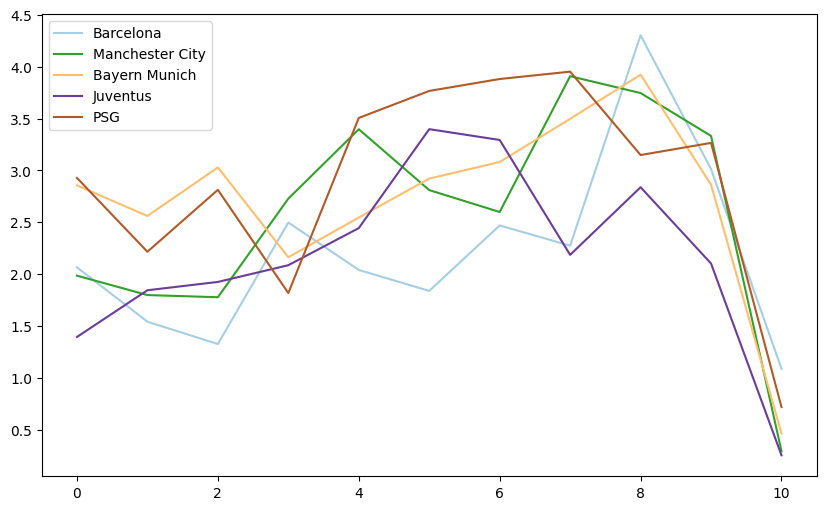

In [18]:
ax = top[['Barcelona', 'Manchester City', 'Bayern Munich', 'Juventus', 'PSG']].plot(colormap='Paired', figsize=(10, 6))
fig = ax.get_figure()
fig.savefig('../images/top_teams_player_centralities.png')

In [15]:
bottom

,team_name,Malaga,WBA,Benevento,Metz,Koln
0,0,0.000000,1.205988,0.419112,0.865072,1.381821
1,1,0.000000,0.533570,0.874291,0.998571,1.451324
2,2,1.102463,0.323456,0.398506,0.162801,1.541089
3,3,0.000000,0.330277,0.033247,0.595470,0.855595
4,4,0.863824,0.792951,0.637243,1.477944,0.761207
5,5,0.869470,1.814253,1.522270,1.382465,1.215369
6,6,0.069644,0.713121,0.536648,2.158376,1.420940
7,7,0.909744,1.044760,0.860640,1.511820,2.148869
8,8,0.208932,2.317159,1.702547,2.254202,2.327995
9,9,0.123540,1.994063,0.954524,2.024934,1.994727


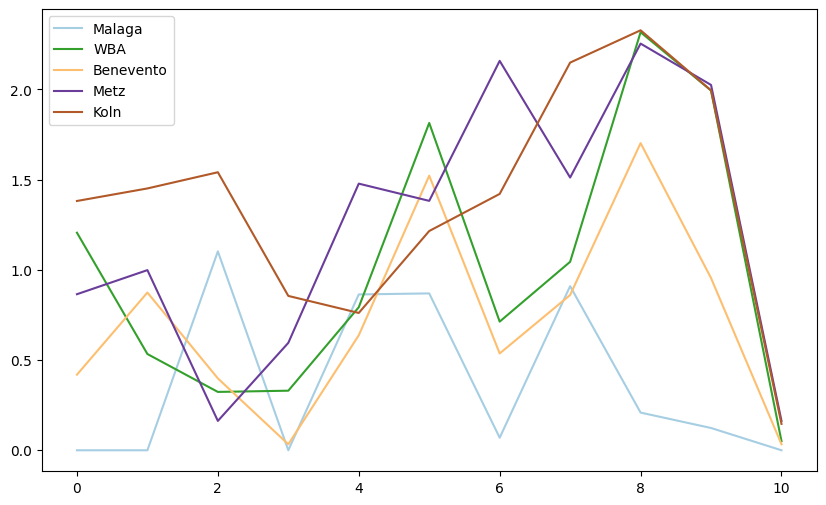

In [19]:
ax = bottom[['Malaga', 'WBA', 'Benevento', 'Metz', 'Koln']].plot(colormap='Paired', figsize=(10, 6))
fig = ax.get_figure()
fig.savefig('../images/bottom_teams_player_centralities.png')

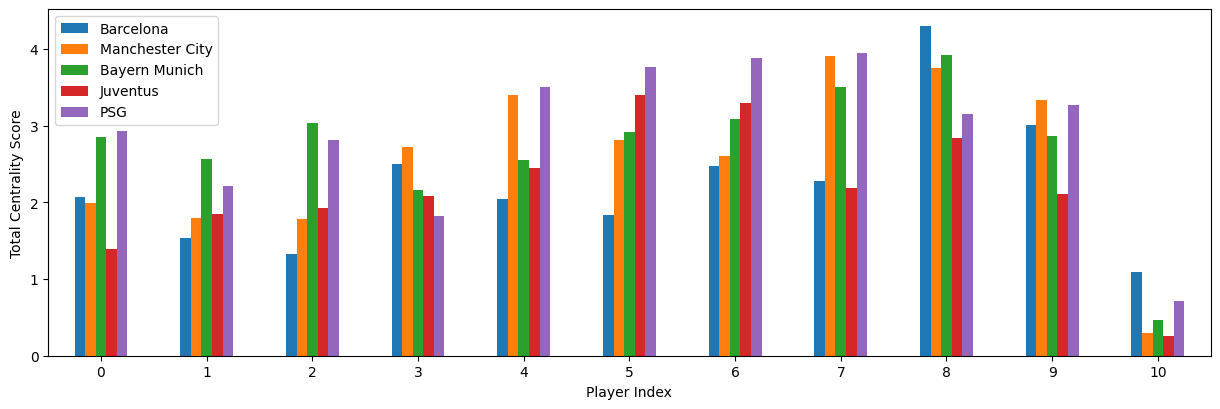

In [75]:
ax = top[['Barcelona', 'Manchester City', 'Bayern Munich', 'Juventus', 'PSG']].plot.bar(rot=0, figsize=(15, 4.5))
ax.set_xlabel("Player Index")
ax.set_ylabel("Total Centrality Score")
ax.figure.savefig('../images/top_teams_player_centralities.png')

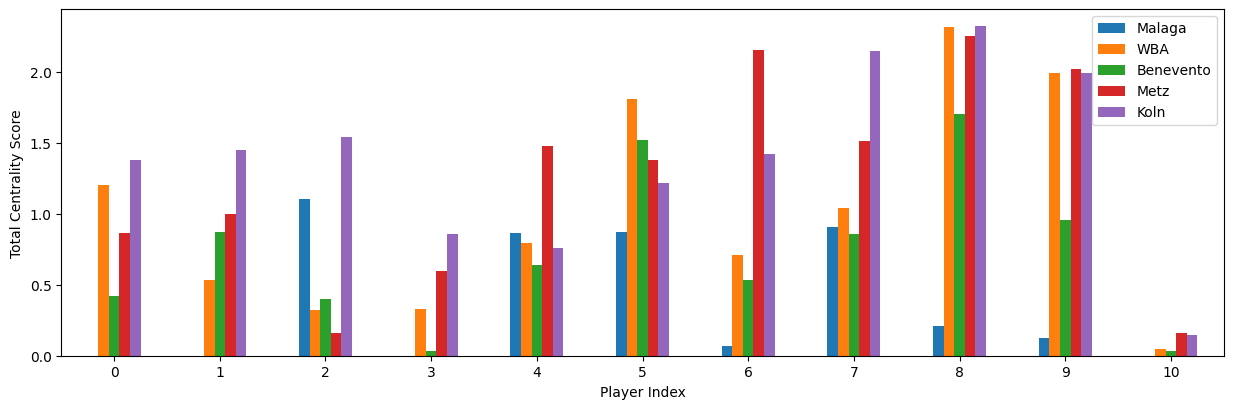

In [76]:
ax = bottom[['Malaga', 'WBA', 'Benevento', 'Metz', 'Koln']].plot.bar(rot=0, figsize=(15, 4.5))
ax.set_xlabel("Player Index")
ax.set_ylabel("Total Centrality Score")
ax.figure.savefig('../images/bottom_teams_player_centralities.png')

In [ ]:
figure, axis = plt.subplots(2, 1) 

axis[0, 0].plot(X, Y1) 
axis[0, 0].set_title("Sine Function") 

In [148]:
df = pd.read_csv("../Data/output/centralities/centralities_all.csv")

In [149]:
top_teams = [676, 1625, 2444, 3159, 3767]
bottom_teams = [683, 1627, 3219, 3777, 2463]

In [150]:
filtered_df = df[(df["team_id"].isin(top_teams)) | df["team_id"].isin(bottom_teams)].reset_index()

In [151]:
top_teams_in = []
bottom_teams_in = []

top_teams_out = []
bottom_teams_out = []

for index, row in filtered_df.iterrows():
    if row['team_id'] in top_teams:
        top_teams_in.append(re.findall(r'\d+', row['in_degree']))
        top_teams_out.append(re.findall(r'\d+', row['out_degree']))
    elif row['team_id'] in bottom_teams:
        bottom_teams_in.append(re.findall(r'\d+', row['in_degree']))
        bottom_teams_out.append(re.findall(r'\d+', row['out_degree']))

In [152]:
top_teams_in = [[int(num) for num in sub] for sub in top_teams_in]
top_teams_out = [[int(num) for num in sub] for sub in top_teams_out]
bottom_teams_in = [[int(num) for num in sub] for sub in bottom_teams_in]
bottom_teams_out = [[int(num) for num in sub] for sub in bottom_teams_out]

In [153]:
top_in_avg = [sum(col) / float(len(col)) for col in zip(*top_teams_in)]
top_out_avg = [sum(col) / float(len(col)) for col in zip(*top_teams_out)]
bot_in_avg = [sum(col) / float(len(col)) for col in zip(*bottom_teams_in)]
bot_out_avg = [sum(col) / float(len(col)) for col in zip(*bottom_teams_out)]

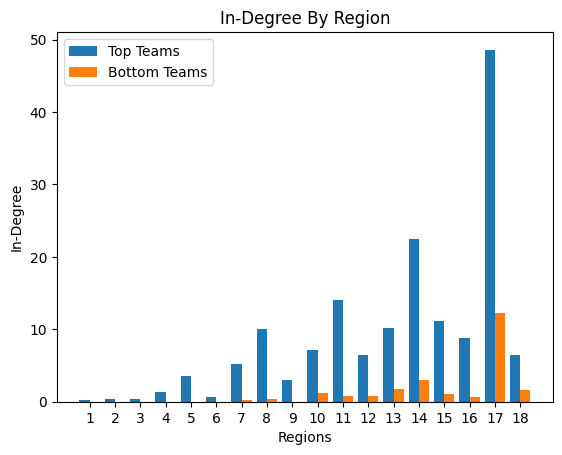

In [154]:
X = list(range(1,19))

X_axis = np.arange(len(X)) 
  
plt.bar(X_axis - 0.2, top_in_avg, 0.4, label = 'Top Teams') 
plt.bar(X_axis + 0.2, bot_in_avg, 0.4, label = 'Bottom Teams') 
  
plt.xticks(X_axis, X) 
plt.xlabel("Regions") 
plt.ylabel("In-Degree") 
plt.title("In-Degree By Region") 
plt.legend() 
plt.savefig('../images/in_degree_region.png')
# plt.show() 

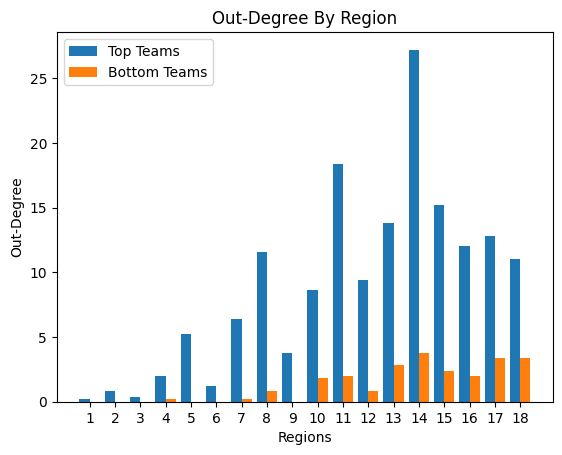

In [155]:
X = list(range(1,19))

X_axis = np.arange(len(X)) 
  
plt.bar(X_axis - 0.2, top_out_avg, 0.4, label = 'Top Teams') 
plt.bar(X_axis + 0.2, bot_out_avg, 0.4, label = 'Bottom Teams') 
  
plt.xticks(X_axis, X) 
plt.xlabel("Regions") 
plt.ylabel("Out-Degree") 
plt.title("Out-Degree By Region") 
plt.legend() 
plt.savefig('../images/out_degree_region.png')
# plt.show() 

In [157]:
df = pd.read_csv("../Data/output/centralities/centralities_players_all.csv")

filtered_df = df[(df["team_id"].isin(top_teams)) | df["team_id"].isin(bottom_teams)].reset_index()

top_teams_in = []
bottom_teams_in = []

top_teams_out = []
bottom_teams_out = []

for index, row in filtered_df.iterrows():
    if row['team_id'] in top_teams:
        top_teams_in.append(re.findall(r'\d+', row['in_degree']))
        top_teams_out.append(re.findall(r'\d+', row['out_degree']))
    elif row['team_id'] in bottom_teams:
        bottom_teams_in.append(re.findall(r'\d+', row['in_degree']))
        bottom_teams_out.append(re.findall(r'\d+', row['out_degree']))
top_teams_in = [[int(num) for num in sub] for sub in top_teams_in]
top_teams_out = [[int(num) for num in sub] for sub in top_teams_out]
bottom_teams_in = [[int(num) for num in sub] for sub in bottom_teams_in]
bottom_teams_out = [[int(num) for num in sub] for sub in bottom_teams_out]

top_in_avg = [sum(col) / float(len(col)) for col in zip(*top_teams_in)]
top_out_avg = [sum(col) / float(len(col)) for col in zip(*top_teams_out)]
bot_in_avg = [sum(col) / float(len(col)) for col in zip(*bottom_teams_in)]
bot_out_avg = [sum(col) / float(len(col)) for col in zip(*bottom_teams_out)]


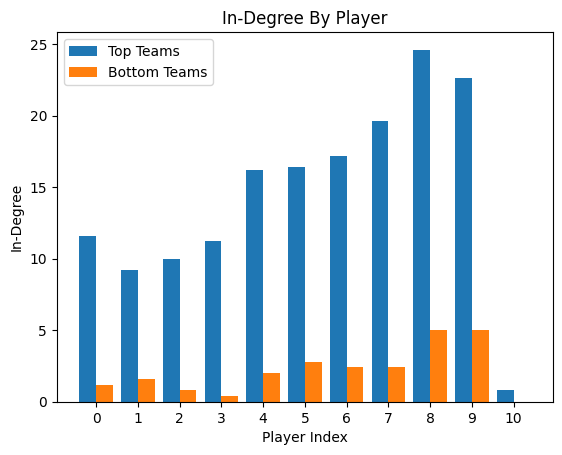

In [158]:
X = list(range(11))

X_axis = np.arange(len(X)) 
  
plt.bar(X_axis - 0.2, top_in_avg, 0.4, label = 'Top Teams') 
plt.bar(X_axis + 0.2, bot_in_avg, 0.4, label = 'Bottom Teams') 
  
plt.xticks(X_axis, X) 
plt.xlabel("Player Index") 
plt.ylabel("In-Degree") 
plt.title("In-Degree By Player") 
plt.legend() 
plt.savefig('../images/in_degree_player.png')
# plt.show() 

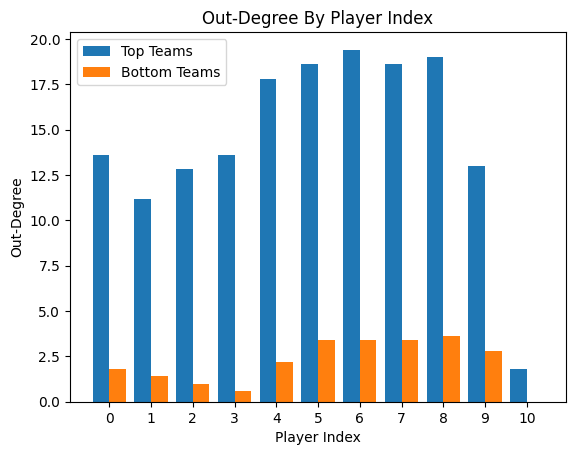

In [160]:
X = list(range(11))

X_axis = np.arange(len(X)) 
  
plt.bar(X_axis - 0.2, top_out_avg, 0.4, label = 'Top Teams') 
plt.bar(X_axis + 0.2, bot_out_avg, 0.4, label = 'Bottom Teams') 
  
plt.xticks(X_axis, X) 
plt.xlabel("Player Index") 
plt.ylabel("Out-Degree") 
plt.title("Out-Degree By Player Index") 
plt.legend() 
plt.savefig('../images/out_degree_player.png')
# plt.show() 

In [119]:
df = pd.read_csv("../Data/output/centralities/centralities_players_all.csv")

filtered_df = df[(df["team_id"].isin(top_teams)) | df["team_id"].isin(bottom_teams)].reset_index()

top_teams_cc = []
bottom_teams_cc = []

for index, row in filtered_df.iterrows():
    if row['team_id'] in top_teams:
        top_teams_cc.append(re.findall(r': (\d+\.\d*|0)', row['clustering_coef']))
    elif row['team_id'] in bottom_teams:
        bottom_teams_cc.append(re.findall(r': (\d+\.\d*|0)', row['clustering_coef']))
top_teams_cc = [[float(num) for num in sub] for sub in top_teams_cc]
bottom_teams_cc = [[float(num) for num in sub] for sub in bottom_teams_cc]

top_cc_avg = [sum(col) / float(len(col)) for col in zip(*top_teams_cc)]
bot_cc_avg = [sum(col) / float(len(col)) for col in zip(*bottom_teams_cc)]


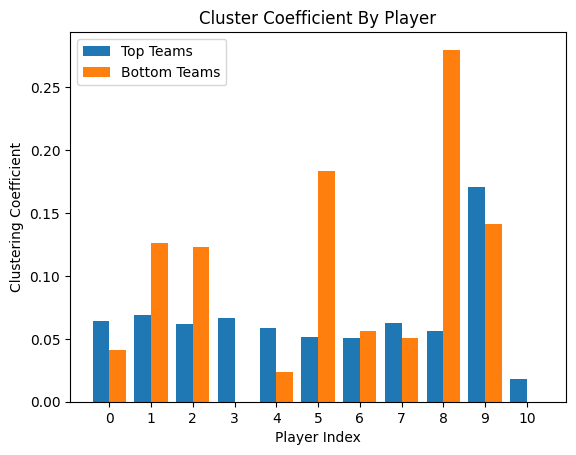

In [124]:
X = list(range(11))

X_axis = np.arange(len(X)) 
  
plt.bar(X_axis - 0.2, top_cc_avg, 0.4, label = 'Top Teams') 
plt.bar(X_axis + 0.2, bot_cc_avg, 0.4, label = 'Bottom Teams') 
  
plt.xticks(X_axis, X) 
plt.xlabel("Player Index") 
plt.ylabel("Clustering Coefficient") 
plt.title("Clustering Coefficient By Player") 
plt.legend() 
plt.savefig('../images/cc_player.png')
# plt.show() 

In [125]:
df = pd.read_csv("../Data/output/centralities/centralities_all.csv")

filtered_df = df[(df["team_id"].isin(top_teams)) | df["team_id"].isin(bottom_teams)].reset_index()

top_teams_cc = []
bottom_teams_cc = []

for index, row in filtered_df.iterrows():
    if row['team_id'] in top_teams:
        top_teams_cc.append(re.findall(r': (\d+\.\d*|0)', row['clustering_coef']))
    elif row['team_id'] in bottom_teams:
        bottom_teams_cc.append(re.findall(r': (\d+\.\d*|0)', row['clustering_coef']))
top_teams_cc = [[float(num) for num in sub] for sub in top_teams_cc]
bottom_teams_cc = [[float(num) for num in sub] for sub in bottom_teams_cc]

top_cc_avg = [sum(col) / float(len(col)) for col in zip(*top_teams_cc)]
bot_cc_avg = [sum(col) / float(len(col)) for col in zip(*bottom_teams_cc)]


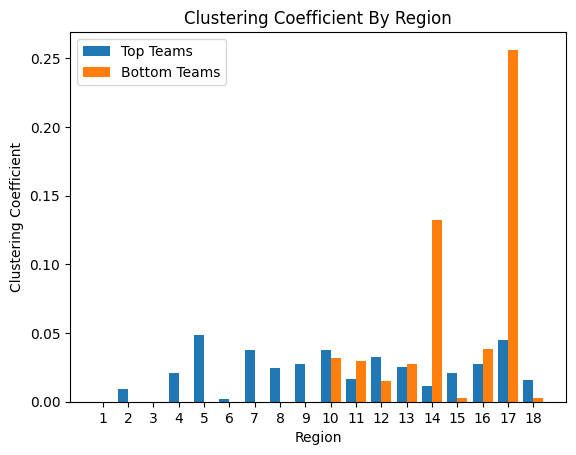

In [145]:
X = list(range(1,19))

X_axis = np.arange(len(X)) 
  
plt.bar(X_axis - 0.2, top_cc_avg, 0.4, label = 'Top Teams') 
plt.bar(X_axis + 0.2, bot_cc_avg, 0.4, label = 'Bottom Teams') 
  
plt.xticks(X_axis, X) 
plt.xlabel("Region") 
plt.ylabel("Clustering Coefficient") 
plt.title("Clustering Coefficient By Region") 
plt.legend() 
plt.savefig('../images/cc_region.png')
# plt.show() 

In [131]:
df = pd.read_csv("../Data/output/centralities/centralities_players_all.csv")

filtered_df = df[(df["team_id"].isin(top_teams)) | df["team_id"].isin(bottom_teams)].reset_index()

pr = []

for index, row in filtered_df.iterrows():
    if row['team_id'] == 683:
        pr.append(re.findall(r': (\d+\.\d*|0)', row['pagerank']))
        
pr = [[float(num) for num in sub] for sub in pr]

# top_cc_avg = [sum(col) / float(len(col)) for col in zip(*top_teams_cc)]
# bot_cc_avg = [sum(col) / float(len(col)) for col in zip(*bottom_teams_cc)]


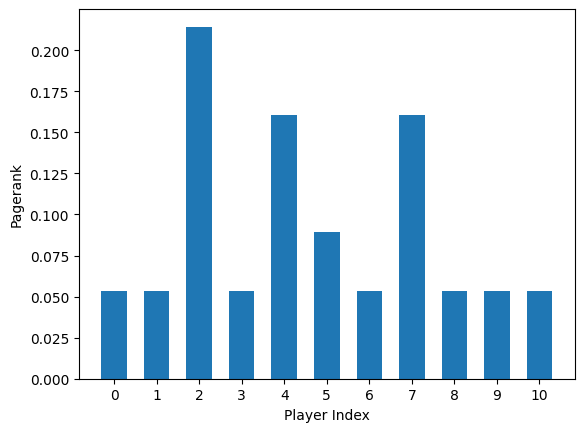

In [142]:
X = list(range(11))

X_axis = np.arange(len(X)) 
  
plt.bar(X_axis, pr[0], 0.6) 
  
plt.xticks(X_axis, X) 
plt.xlabel("Player Index") 
plt.ylabel("Pagerank") 
plt.savefig('../images/pr_player_mal.png')
# plt.show() 

In [143]:
df = pd.read_csv("../Data/output/centralities/centralities_all.csv")

filtered_df = df[(df["team_id"].isin(top_teams)) | df["team_id"].isin(bottom_teams)].reset_index()

pr = []

for index, row in filtered_df.iterrows():
    if row['team_id'] == 683:
        pr.append(re.findall(r': (\d+\.\d*|0)', row['pagerank']))
        
pr = [[float(num) for num in sub] for sub in pr]

# top_cc_avg = [sum(col) / float(len(col)) for col in zip(*top_teams_cc)]
# bot_cc_avg = [sum(col) / float(len(col)) for col in zip(*bottom_teams_cc)]


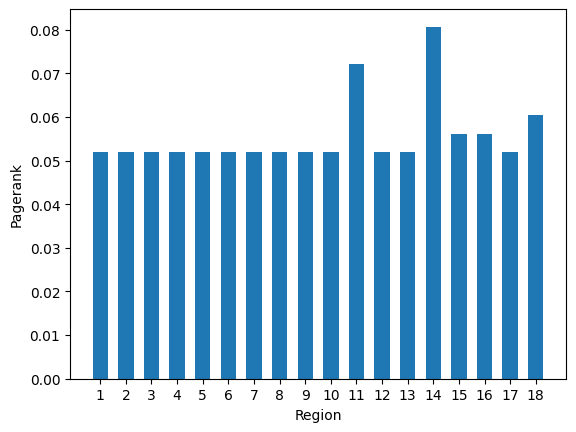

In [146]:
X = list(range(1,19))

X_axis = np.arange(len(X)) 
  
plt.bar(X_axis, pr[0], 0.6) 
  
plt.xticks(X_axis, X) 
plt.xlabel("Region") 
plt.ylabel("Pagerank") 
plt.savefig('../images/pr_region_mal.png')
# plt.show() 